In [1]:
%matplotlib inline
import os, sys, glob, scipy, warnings
import scipy.stats as ss
from scipy.stats import pearsonr,spearmanr
from scipy.spatial.distance import squareform
import matplotlib, scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# plot configuration
%config InlineBackend.figure_formats = ["svg"]
#font_manager.fontManager.addfont(os.path.join("..", "assets", "Helvetica.ttf"))
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
pd.set_option("display.max_columns", None)
pd.set_option("show_dimensions", True)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
pd.set_option('show_dimensions', True)

In [4]:
base_dir='/Users/orlacamus/Desktop/projects/IAT240615/'

In [5]:
subList=[101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,
        134,135,136,137,138,139,140,141,142,143,144,145,146,147,149,150,151,153,154,158,160,161,163,164,165]

In [6]:
data=pd.read_csv(base_dir+'merged_data.csv',encoding='latin-1')
data=data.loc[data['subjID'].isin(subList),:]
data=data.loc[data['error']==0,:]
data['event']='zero'
data.reset_index(drop=False,inplace=True)

for i in range(len(data)):
  if (data.loc[i,'condition']=='real')|(data.loc[i,'condition']=='unreal'):
    data.loc[i,'event']=data.loc[i,'condition']
  if 'ev1' in data.loc[i,'condition']:
    data.loc[i,'event']='CR'
  if 'ev2' in data.loc[i,'condition']:
    data.loc[i,'event']='CI'

data

,index,Unnamed: 0,subjID,stim,order,condition,resp_1,resp_2,response,error,resp_num,RT,init.time,distractor,ideal.y.int,maxdev,real.time,comments,timestamps,File,mt_id,mt_id.1,xpos_max,xpos_min,ypos_max,ypos_min,MAD,MAD_time,MD_above,MD_above_time,MD_below,MD_below_time,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT.1,initiation_time,idle_time,1.timestamps,2.timestamps,3.timestamps,4.timestamps,5.timestamps,6.timestamps,7.timestamps,8.timestamps,9.timestamps,10.timestamps,11.timestamps,12.timestamps,13.timestamps,14.timestamps,15.timestamps,16.timestamps,17.timestamps,18.timestamps,19.timestamps,20.timestamps,21.timestamps,22.timestamps,23.timestamps,24.timestamps,25.timestamps,26.timestamps,27.timestamps,28.timestamps,29.timestamps,30.timestamps,31.timestamps,32.timestamps,33.timestamps,34.timestamps,35.timestamps,36.timestamps,37.timestamps,38.timestamps,39.timestamps,40.timestamps,41.timestamps,42.timestamps,43.timestamps,44.timestamps,45.timestamps,46.timestamps,47.timestamps,48.timestamps,49.timestamps,50.timestamps,51.timestamps,52.timestamps,53.timestamps,54.timestamps,55.timestamps,56.timestamps,57.timestamps,58.timestamps,59.timestamps,60.timestamps,61.timestamps,62.timestamps,63.timestamps,64.timestamps,65.timestamps,66.timestamps,67.timestamps,68.timestamps,69.timestamps,70.timestamps,71.timestamps,72.timestamps,73.timestamps,74.timestamps,75.timestamps,76.timestamps,77.timestamps,78.timestamps,79.timestamps,80.timestamps,81.timestamps,82.timestamps,83.timestamps,84.timestamps,85.timestamps,86.timestamps,87.timestamps,88.timestamps,89.timestamps,90.timestamps,91.timestamps,92.timestamps,93.timestamps,94.timestamps,95.timestamps,96.timestamps,97.timestamps,98.timestamps,99.timestamps,100.timestamps,101.timestamps,1.xpos,2.xpos,3.xpos,4.xpos,5.xpos,6.xpos,7.xpos,8.xpos,9.xpos,10.xpos,11.xpos,12.xpos,13.xpos,14.xpos,15.xpos,16.xpos,17.xpos,18.xpos,19.xpos,20.xpos,21.xpos,22.xpos,23.xpos,24.xpos,25.xpos,26.xpos,27.xpos,28.xpos,29.xpos,30.xpos,31.xpos,32.xpos,33.xpos,34.xpos,35.xpos,36.xpos,37.xpos,38.xpos,39.xpos,40.xpos,41.xpos,42.xpos,43.xpos,44.xpos,45.xpos,46.xpos,47.xpos,48.xpos,49.xpos,50.xpos,51.xpos,52.xpos,53.xpos,54.xpos,55.xpos,56.xpos,57.xpos,58.xpos,59.xpos,60.xpos,61.xpos,62.xpos,63.xpos,64.xpos,65.xpos,66.xpos,67.xpos,68.xpos,69.xpos,70.xpos,71.xpos,72.xpos,73.xpos,74.xpos,75.xpos,76.xpos,77.xpos,78.xpos,79.xpos,80.xpos,81.xpos,82.xpos,83.xpos,84.xpos,85.xpos,86.xpos,87.xpos,88.xpos,89.xpos,90.xpos,91.xpos,92.xpos,93.xpos,94.xpos,95.xpos,96.xpos,97.xpos,98.xpos,99.xpos,100.xpos,101.xpos,1.ypos,2.ypos,3.ypos,4.ypos,5.ypos,6.ypos,7.ypos,8.ypos,9.ypos,10.ypos,11.ypos,12.ypos,13.ypos,14.ypos,15.ypos,16.ypos,17.ypos,18.ypos,19.ypos,20.ypos,21.ypos,22.ypos,23.ypos,24.ypos,25.ypos,26.ypos,27.ypos,28.ypos,29.ypos,30.ypos,31.ypos,32.ypos,33.ypos,34.ypos,35.ypos,36.ypos,37.ypos,38.ypos,39.ypos,40.ypos,41.ypos,42.ypos,43.ypos,44.ypos,45.ypos,46.ypos,47.ypos,48.ypos,49.ypos,50.ypos,51.ypos,52.ypos,53.ypos,54.ypos,55.ypos,56.ypos,57.ypos,58.ypos,59.ypos,60.ypos,61.ypos,62.ypos,63.ypos,64.ypos,65.ypos,66.ypos,67.ypos,68.ypos,69.ypos,70.ypos,71.ypos,72.ypos,73.ypos,74.ypos,75.ypos,76.ypos,77.ypos,78.ypos,79.ypos,80.ypos,81.ypos,82.ypos,83.ypos,84.ypos,85.ypos,86.ypos,87.ypos,88.ypos,89.ypos,90.ypos,91.ypos,92.ypos,93.ypos,94.ypos,95.ypos,96.ypos,97.ypos,98.ypos,99.ypos,100.ypos,101.ypos,1.steps,2.steps,3.steps,4.steps,5.steps,6.steps,7.steps,8.steps,9.steps,10.steps,11.steps,12.steps,13.steps,14.steps,15.steps,16.steps,17.steps,18.steps,19.steps,20.steps,21.steps,22.steps,23.steps,24.steps,25.steps,26.steps,27.steps,28.steps,29.steps,30.steps,31.steps,32.steps,33.steps,34.steps,35.steps,36.steps,37.steps,38.steps,39.steps,40.steps,41.steps,42.steps,43.steps,44.steps,45.steps,46.steps,47.steps,48.steps,49.steps,50.steps,51.steps,52.steps,53.steps,54.steps,55.steps,56.steps,57.steps,58.steps,59.steps,60.steps,61.steps,62.steps,63.steps,64.steps,65.steps,66.steps,67.steps,68.steps,69.steps,70.steps,71.steps,

# visualize

In [9]:

import numpy as np

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [10]:
%config InlineBackend.figure_formats = ["svg"]
# minus in figure
plt.rcParams["axes.unicode_minus"]=False
# other style
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [11]:
data.run

0          congruent
1          congruent
            ...     
19799    incongruent
19800    incongruent
Name: run, Length: 19801, dtype: object

In [61]:
congruent=data.loc[data.run=='congruent',:]
incongruent=data.loc[data.run=='incongruent',:]
ev1_con=congruent.loc[(congruent.event=='real') | (congruent.event=='CR'),:]
ev2_con=congruent.loc[(congruent.event=='unreal') | (congruent.event=='CI'),:]
ev1_incon=incongruent.loc[(incongruent.event=='real') | (incongruent.event=='CR'),:]
ev2_incon=incongruent.loc[(incongruent.event=='unreal') | (incongruent.event=='CI'),:]


In [62]:
agg_congruent=congruent.groupby('subjID').agg('mean')
agg_incongruent=incongruent.groupby('subjID').agg('mean')
agg_ev1_con=ev1_con.groupby('subjID').agg('mean')
agg_ev2_con=ev2_con.groupby('subjID').agg('mean')
agg_ev1_incon=ev1_incon.groupby('subjID').agg('mean')
agg_ev2_incon=ev2_incon.groupby('subjID').agg('mean')

In [63]:
print(scipy.stats.ttest_rel(agg_incongruent.AUC,agg_congruent.AUC))
print(scipy.stats.ttest_rel(agg_incongruent.AUC,agg_congruent.AUC).confidence_interval(confidence_level=0.95))

TtestResult(statistic=3.019547639092999, pvalue=0.0037833381012464516, df=57)
ConfidenceInterval(low=0.01047749268625298, high=0.05173436970336939)


In [64]:
print(scipy.stats.ttest_rel(agg_ev1_incon.AUC,agg_ev1_con.AUC))
print(scipy.stats.ttest_rel(agg_ev1_incon.AUC,agg_ev1_con.AUC).confidence_interval(confidence_level=0.95))

TtestResult(statistic=4.864739992030932, pvalue=9.417415114598894e-06, df=57)
ConfidenceInterval(low=0.036657874302354704, high=0.08795003811253148)


In [65]:
print(scipy.stats.ttest_rel(agg_ev2_incon.AUC,agg_ev2_con.AUC))
print(scipy.stats.ttest_rel(agg_ev2_incon.AUC,agg_ev2_con.AUC).confidence_interval(confidence_level=0.95))

TtestResult(statistic=0.2606362150532197, pvalue=0.7953123696146301, df=57)
ConfidenceInterval(low=-0.03541227333254662, high=0.04601000662742408)


In [66]:
from scipy import stats

In [67]:
agg_congruent.columns[130]

'1.xpos'

/Users/orlacamus/opt/anaconda3/envs/fMRI/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<Figure size 400x400 with 0 Axes>

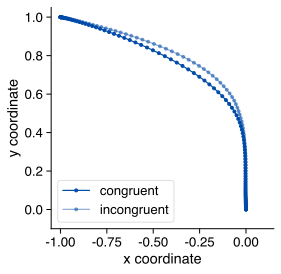

In [68]:
# plot subject level average trajectory of congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 4))
plt.subplots(figsize=(4, 4))

x1=np.mean(agg_congruent.iloc[:,130:(130+101)])
y1=np.mean(agg_congruent.iloc[:,(130+101):(130+101+101)])

x2=np.mean(agg_incongruent.iloc[:,130:(130+101)])
y2=np.mean(agg_incongruent.iloc[:,(130+101):(130+101+101)])

se1=stats.sem(agg_congruent.iloc[:,(130+101):(130+101+101)])
se2=stats.sem(agg_incongruent.iloc[:,(130+101):(130+101+101)])

plt.plot(x1,y1, "-o", color="#004ba8", markersize=3, markeredgecolor="#004ba8", markerfacecolor="#004ba8")

plt.plot(x2,y2, "-o", color="#004ba875", markersize=3, markeredgecolor="#004ba875", markerfacecolor="#004ba875")

#plt.fill_between(x1, y1-se1, y1+se1,color='#004ba8')
#plt.fill_between(x2, y2-se2, y2+se2,color='#004ba875')

plt.legend(['congruent','incongruent'],loc="lower left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1.05, 0.15))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig("/Users/orlacamus/Downloads/condition_trajectory.svg", bbox_inches="tight")

In [69]:
idxmax1=agg_congruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_incongruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))

TtestResult(statistic=-0.33070034323131653, pvalue=0.7420834148389976, df=57)


57
59
TtestResult(statistic=-0.33070034323131653, pvalue=0.7420834148389976, df=57)


<Figure size 800x400 with 0 Axes>

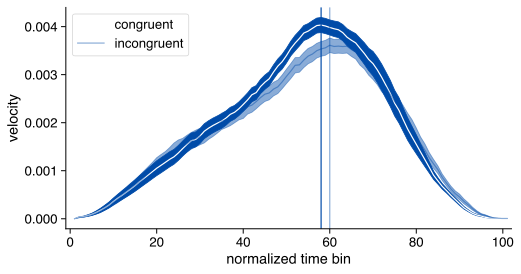

In [70]:
# plot subject level average vel for congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.subplots(figsize=(8, 4))

x1=np.mean(agg_congruent.iloc[:,332:(332+101)])
y1=np.mean(agg_congruent.iloc[:,(736):(736+101)])

x2=np.mean(agg_incongruent.iloc[:,332:(332+101)])
y2=np.mean(agg_incongruent.iloc[:,(736):(736+101)])


se1=stats.sem(agg_congruent.iloc[:,(736):(736+101)])
se2=stats.sem(agg_incongruent.iloc[:,(736):(736+101)])

plt.plot(x1,y1, "-", color="white", markersize=3, markeredgecolor="white", markerfacecolor="white")

plt.plot(x2,y2, "-", color="#004ba875", markersize=3, markeredgecolor="#004ba875", markerfacecolor="#004ba875")

plt.fill_between(x1, y1-se1, y1+se1,color='#004ba8')
plt.fill_between(x2, y2-se2, y2+se2,color='#004ba875')

plt.legend(['congruent','incongruent'],loc="upper left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1, 102))
#plt.ylim((-.1, 1.05))
plt.axvline(x=np.argmax(np.mean(agg_congruent.iloc[:,(736):(736+101)]))+1,color='#004ba8')
plt.axvline(x=np.argmax(np.mean(agg_incongruent.iloc[:,(736):(736+101)]))+1,color="#004ba875")
plt.xlabel("normalized time bin")
plt.ylabel("velocity")
plt.savefig("/Users/orlacamus/Downloads/vel_condition.svg", bbox_inches="tight")
print(np.argmax(np.mean(agg_congruent.iloc[:,(736):(736+101)])))
print(np.argmax(np.mean(agg_incongruent.iloc[:,(736):(736+101)])))

idxmax1=agg_congruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_incongruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))

<Figure size 400x400 with 0 Axes>

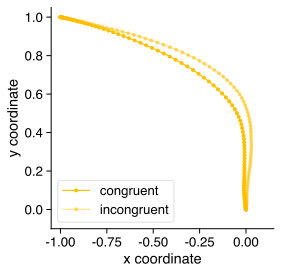

In [71]:
# plot subject level average trajectory of ev1 and ev2 (congruent)
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 4))
plt.subplots(figsize=(4, 4))


x1=np.mean(agg_ev1_con.iloc[:,130:(130+101)])
y1=np.mean(agg_ev1_con.iloc[:,(130+101):(130+101+101)])

x2=np.mean(agg_ev1_incon.iloc[:,130:(130+101)])
y2=np.mean(agg_ev1_incon.iloc[:,(130+101):(130+101+101)])


plt.plot(x1,y1, "-o", color="#ffbf00", markersize=3, markeredgecolor="#ffbf00", markerfacecolor="#ffbf00")
plt.plot(x2,y2, "-o", color="#ffbf0075", markersize=3, markeredgecolor="#ffbf0075", markerfacecolor="#ffbf0075")



plt.legend(['congruent','incongruent'],loc="lower left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1.05, 0.15))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig("/Users/orlacamus/Downloads/ev1_trajectory.svg", bbox_inches="tight")

56
63
TtestResult(statistic=-0.7999282688885653, pvalue=0.4270736265694334, df=57)


<Figure size 800x400 with 0 Axes>

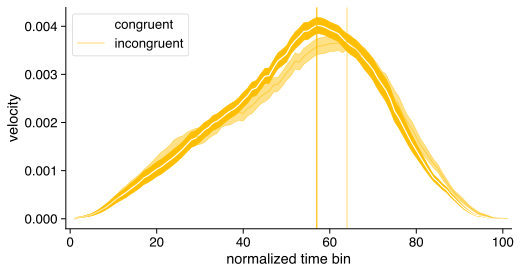

In [72]:
# plot subject level average vel for congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.subplots(figsize=(8, 4))


x1=np.mean(agg_ev1_con.iloc[:,332:(332+101)])
y1=np.mean(agg_ev1_con.iloc[:,(736):(736+101)])

x2=np.mean(agg_ev1_incon.iloc[:,332:(332+101)])
y2=np.mean(agg_ev1_incon.iloc[:,(736):(736+101)])


se1=stats.sem(agg_ev1_con.iloc[:,(736):(736+101)])
se2=stats.sem(agg_ev1_incon.iloc[:,(736):(736+101)])

plt.plot(x1,y1, "-", color="white", markersize=3, markeredgecolor="white", markerfacecolor="white")

plt.plot(x2,y2, "-", color="#ffbf0075", markersize=3, markeredgecolor="#ffbf0075", markerfacecolor="#ffbf0075")

plt.fill_between(x1, y1-se1, y1+se1,color='#ffbf00')
plt.fill_between(x2, y2-se2, y2+se2,color='#ffbf0075')

plt.legend(['congruent','incongruent'],loc="upper left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1, 102))
#plt.ylim((-.1, 1.05))
plt.axvline(x=np.argmax(np.mean(agg_ev1_con.iloc[:,(736):(736+101)]))+1,color='#ffbf00')
plt.axvline(x=np.argmax(np.mean(agg_ev1_incon.iloc[:,(736):(736+101)]))+1,color="#ffbf0075")
plt.xlabel("normalized time bin")
plt.ylabel("velocity")
plt.savefig("/Users/orlacamus/Downloads/vel_ev1.svg", bbox_inches="tight")
print(np.argmax(np.mean(agg_ev1_con.iloc[:,(736):(736+101)])))
print(np.argmax(np.mean(agg_ev1_incon.iloc[:,(736):(736+101)])))

idxmax1=agg_ev1_con.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_ev1_incon.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))

<Figure size 400x400 with 0 Axes>

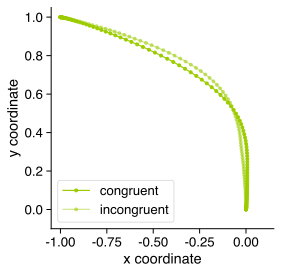

In [73]:
# plot subject level average trajectory of ev1 and ev2 (incongruent)
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 4))
plt.subplots(figsize=(4, 4))




x1=np.mean(agg_ev2_con.iloc[:,130:(130+101)])
y1=np.mean(agg_ev2_con.iloc[:,(130+101):(130+101+101)])

x2=np.mean(agg_ev2_incon.iloc[:,130:(130+101)])
y2=np.mean(agg_ev2_incon.iloc[:,(130+101):(130+101+101)])


plt.plot(x1,y1, "-o", color="#9ccc00", markersize=3, markeredgecolor="#9ccc00", markerfacecolor="#9ccc00")
plt.plot(x2,y2, "-o", color="#9ccc0075", markersize=3, markeredgecolor="#9ccc0075", markerfacecolor="#9ccc0075")


plt.legend(['congruent','incongruent'],loc="lower left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1.05, 0.15))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig("/Users/orlacamus/Downloads/ev2_trajectory.svg", bbox_inches="tight")

57
59
TtestResult(statistic=0.3513236349237507, pvalue=0.7266409092015822, df=57)


<Figure size 800x400 with 0 Axes>

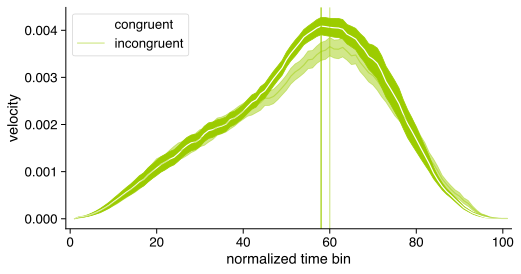

In [74]:
# plot subject level average vel for congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.subplots(figsize=(8, 4))



x1=np.mean(agg_ev2_con.iloc[:,332:(332+101)])
y1=np.mean(agg_ev2_con.iloc[:,(736):(736+101)])

x2=np.mean(agg_ev2_incon.iloc[:,332:(332+101)])
y2=np.mean(agg_ev2_incon.iloc[:,(736):(736+101)])


se1=stats.sem(agg_ev2_con.iloc[:,(736):(736+101)])
se2=stats.sem(agg_ev2_incon.iloc[:,(736):(736+101)])

plt.plot(x1,y1, "-", color="white", markersize=3, markeredgecolor="white", markerfacecolor="white")

plt.plot(x2,y2, "-", color="#9ccc0075", markersize=3, markeredgecolor="#9ccc0075", markerfacecolor="#9ccc0075")

plt.fill_between(x1, y1-se1, y1+se1,color='#9ccc00')
plt.fill_between(x2, y2-se2, y2+se2,color='#9ccc0075')

plt.legend(['congruent','incongruent'],loc="upper left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1, 102))
#plt.ylim((-.1, 1.05))
plt.axvline(x=np.argmax(np.mean(agg_ev2_con.iloc[:,(736):(736+101)]))+1,color='#9ccc00')
plt.axvline(x=np.argmax(np.mean(agg_ev2_incon.iloc[:,(736):(736+101)]))+1,color="#9ccc0075")
plt.xlabel("normalized time bin")
plt.ylabel("velocity")
plt.savefig("/Users/orlacamus/Downloads/vel_ev2.svg", bbox_inches="tight")
print(np.argmax(np.mean(agg_ev2_con.iloc[:,(736):(736+101)])))
print(np.argmax(np.mean(agg_ev2_incon.iloc[:,(736):(736+101)])))

idxmax1=agg_ev2_con.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_ev2_incon.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))
